# Seaborn LIbrary





Seaborn is a Python visualization library based on Matplotlib. Provides a high-level interface for drawing statistical graphics. It is use matplotlib and Pandas to manage data structures.

Short description: Seaborn is more statical oriented, which is good for us

In [25]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
#Example:
import seaborn as sns

#apply the default seaborn theme, scaling, and color palette
sns.set()   

#load one of the example datasets
tips = sns.load_dataset("tips")  

# take a look into the data
tips.head()                     

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

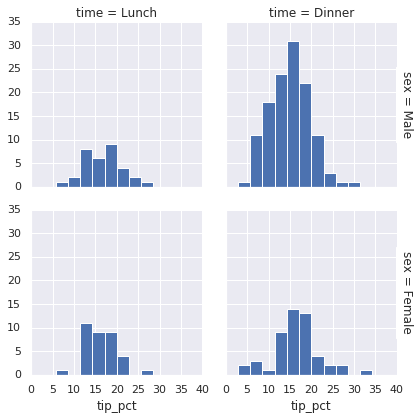

In [27]:
#draw a faceted scatter plot with multiple semantic variables.

#sns.relplot(data=tips, x="total_bill", y="tip", col="time",
#            hue="smoker", style="smoker", size="size");


tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));
sns.set()

In [28]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [29]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

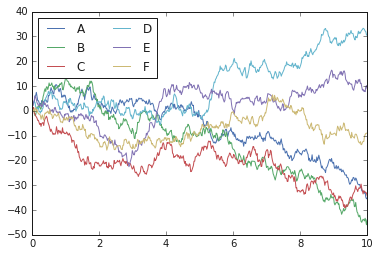

In [30]:


# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');



In [31]:
import seaborn as sns
sns.set()   #dont forget this otherwise the style is not that nice

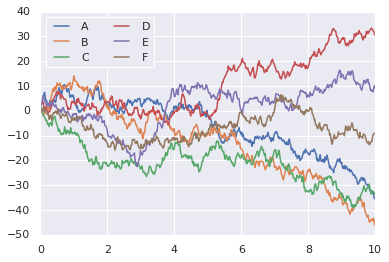

In [32]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');


## We can explore more Seaborn Plots


The idea of seaborn is use high-level commands and some statistical model fitting for useful statistical data exploration


So, we are going to try some examples, please keep in mind than those plot you also can do it using Matplotlib but it will take more lines od code and therefore more time.

I know, I know you also can use R (ggplot2), but you will see that here you will need less lines of code and it will look really nice

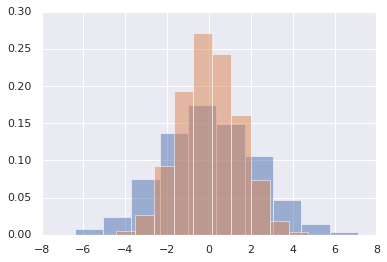

In [33]:
#this is a ramdom data that we are going to use
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

#tiny for loop
for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

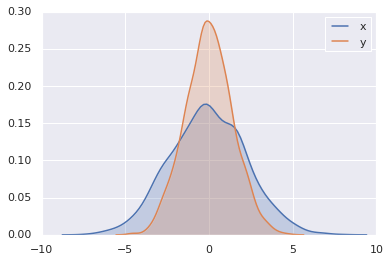

In [10]:
#then instead of see the density in bars we prefer the typical smooth curves
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

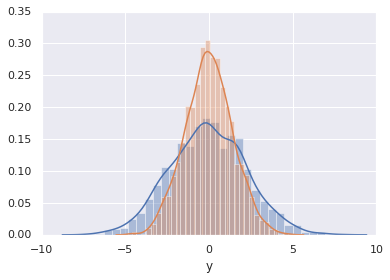

In [11]:
#or
sns.distplot(data['x'])
sns.distplot(data['y']);

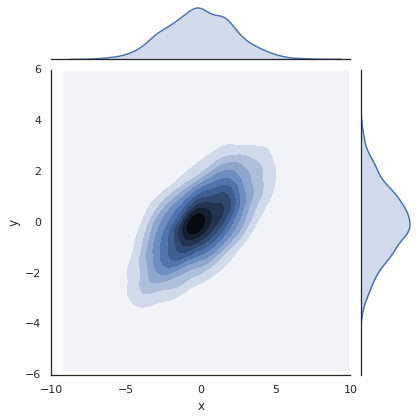

In [12]:
#Adding dimensions: sns.kdeplot(data)
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

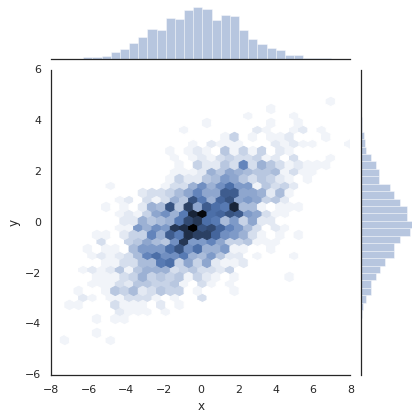

In [13]:
#way cooler:

with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

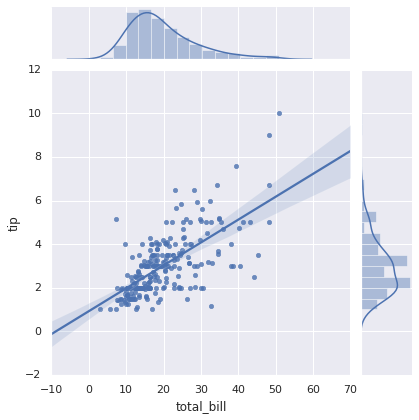

In [14]:
#more useful, using tips data
sns.jointplot("total_bill", "tip", data=tips, kind='reg');


In [15]:
#Now to explore more correlations between variables we can use as is called here PairPlots
#We are going to use the iris dataset

iris = sns.load_dataset("iris")   #load data
iris.head()                       #take a look


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

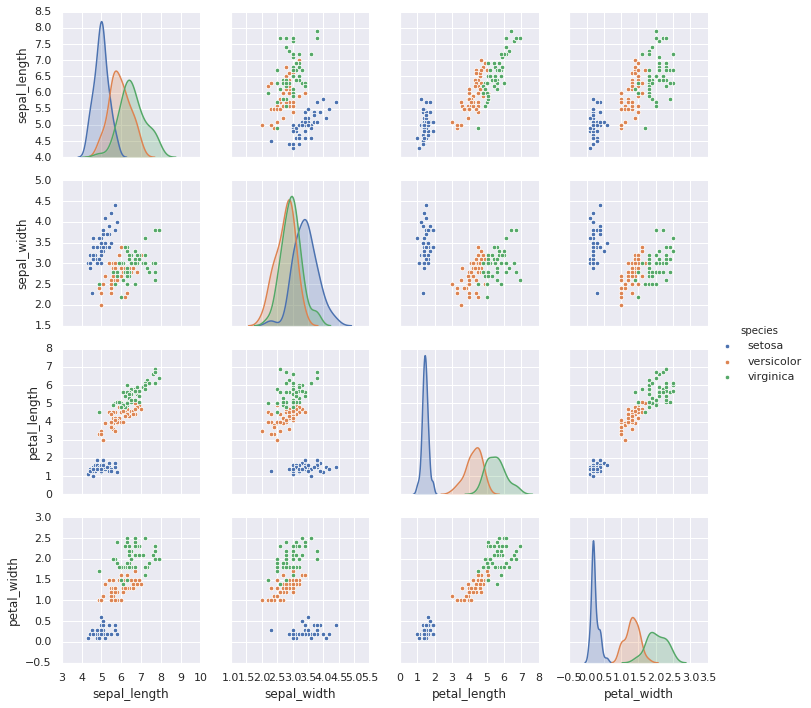

In [23]:
#Guess how is call the function for pairplots

sns.pairplot(iris, hue='species', height=2.5);


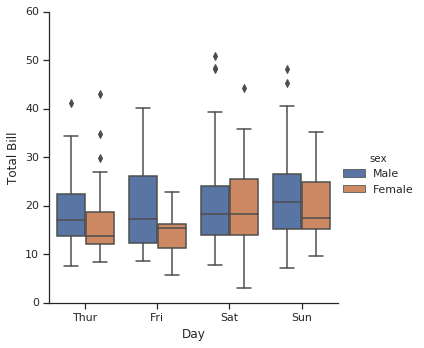

In [22]:
# One representation that we could use a lot is Boxplots, here is call factor plots
# we are using the tips data again

with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

In [18]:
#Another one,that we could use: Barplots

planets = sns.load_dataset('planets')    #load planet data
planets.head()                           #take a look

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

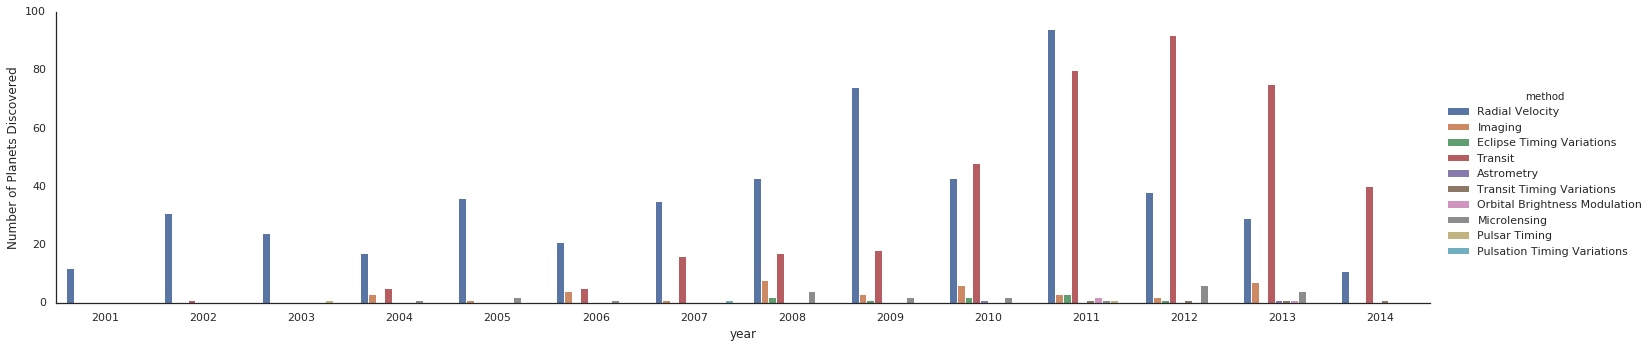

In [24]:
#with 4 lines of code we have this plot that we sow so many times to represent data

with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')



## StripPlots example

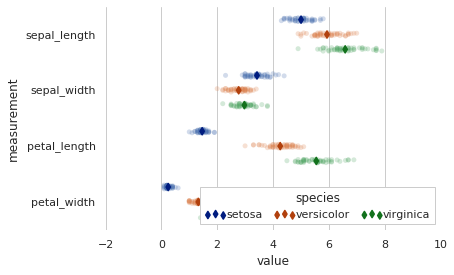

In [20]:
# We are going to plot the conditional means with observations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="species",
              data=iris, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

## Multiple Linear Regresion (MLR)

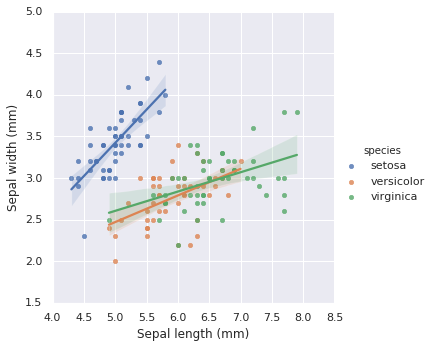

In [21]:


import seaborn as sns
sns.set()

# Load the iris dataset
iris = sns.load_dataset("iris")

# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True,  data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")



More documentation:
    
https://seaborn.pydata.org/ 

    
https://seaborn.pydata.org/tutorial.html    #tutorial

https://seaborn.pydata.org/introduction.html#introduction